Dataset Resource: [Kaggle](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us)

In [173]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [174]:
kill = pd.read_csv('../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Most common 15 Name or Surname of killed people 

In [175]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [176]:
kill.shape

(2535, 14)

In [177]:
kill.name.value_counts()

TK TK                       49
Brandon Jones                2
Michael Johnson              2
Daquan Antonio Westbrook     2
TK Tk                        2
                            ..
Faisal Mohammad              1
Anthonie Smith               1
Cyrus Hurtado                1
Todd Tomlinson               1
Crystal Lee Miley Harry      1
Name: name, Length: 2481, dtype: int64

In [178]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [179]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

In [180]:
pairs.shape

(2486,)

In [181]:
pairs[0]

['Tim', 'Elliot']

In [182]:
pairs[0][0]

'Tim'

In [183]:
table=[]
for i in pairs:
    for j in i:
        table.append(j)

In [184]:
len(table)

5904

In [185]:
most_common_names=Counter(table)
most_common_names

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 38,
         'Lembke': 1,
         'John': 42,
         'Paul': 19,
         'Quintero': 2,
         'Matthew': 24,
         'Hoffman': 2,
         'Michael': 91,
         'Rodriguez': 13,
         'Kenneth': 19,
         'Joe': 9,
         'Brown': 18,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 2,
         'Leslie': 3,
         'Sapp': 2,
         'III': 9,
         'Patrick': 15,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 17,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 10,
         'Loren': 3,
         'Simpson': 4,
         'James': 57,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
    

In [186]:
most_common_names = most_common_names.most_common(15)
most_common_names

[('Michael', 91),
 ('James', 57),
 ('David', 57),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 46),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 38),
 ('Smith', 36),
 ('Richard', 36),
 ('Anthony', 32),
 ('Johnson', 32),
 ('J.', 32)]

In [187]:
df = pd.DataFrame(list(most_common_names), columns=["name_or_surname_most_frequency", "frequency"])
df

,name_or_surname_most_frequency,frequency
0,Michael,91
1,James,57
2,David,57
3,Robert,48
4,Joseph,48
5,William,47
6,Daniel,46
7,John,42
8,Christopher,40
9,Lee,38


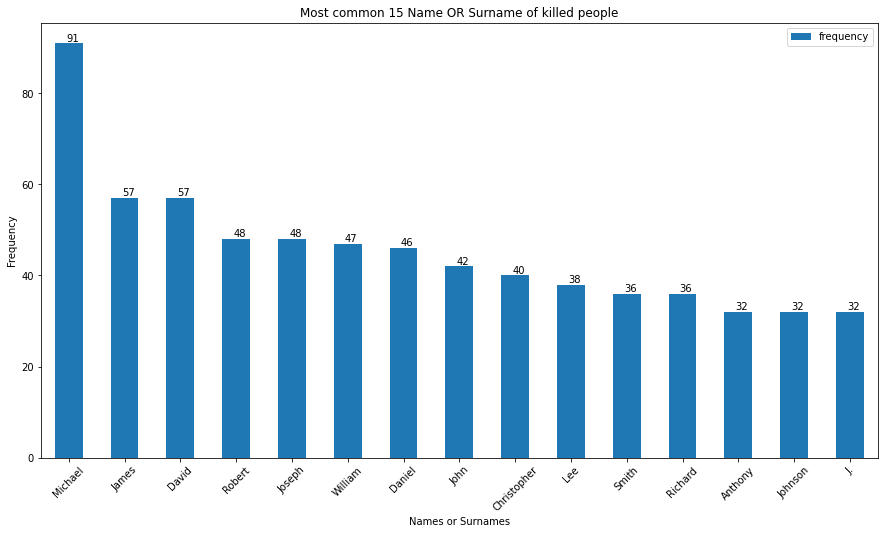

In [188]:
# with pandas
fig, ax = plt.subplots(figsize=(15,8))
df.plot(rot=45, kind='bar', ax=ax)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

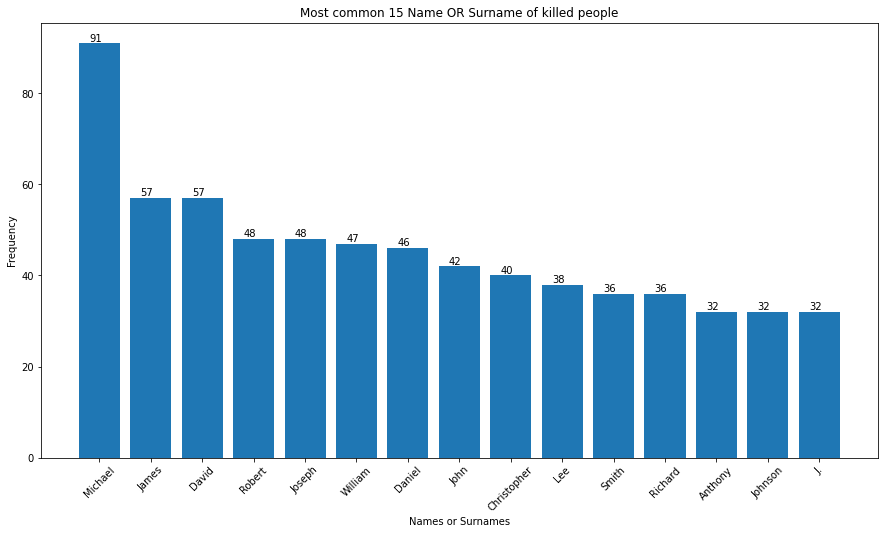

In [189]:
# with matplotlib
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(x=df.name_or_surname_most_frequency, height=df.frequency)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

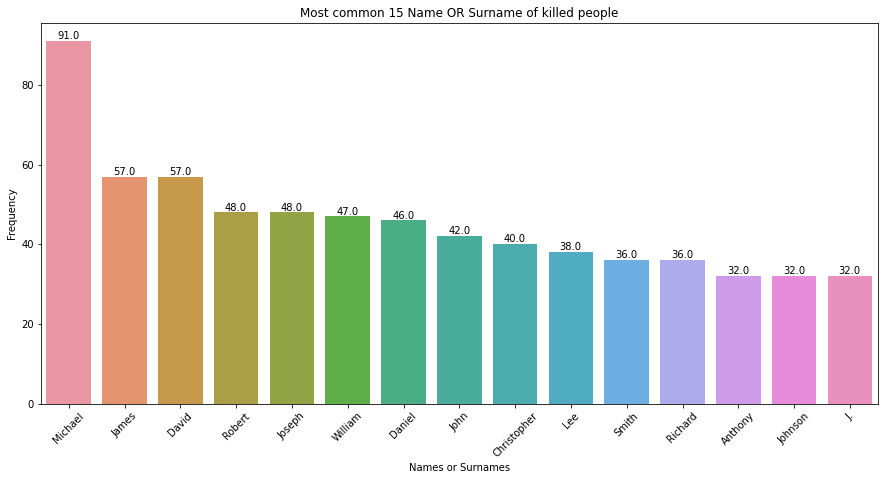

In [190]:
# with seaborn
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x="name_or_surname_most_frequency", y="frequency", data=df)

ax.set_ylabel("Frequency")
ax.set_xlabel("Names or Surnames")
ax.set_title("Most common 15 Name OR Surname of killed people")
ax.set_xticklabels(df.name_or_surname_most_frequency, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+0.5));

## 2. Killed People According to Races (Pie Chart)

In [191]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [192]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [193]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [194]:
kill.dropna(inplace=True)

In [195]:
kill.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [196]:
kill.race.value_counts(dropna=False)

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [197]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [198]:
sizes=kill.race.value_counts().values
sizes

array([1168,  592,  401,   36,   29,   28])

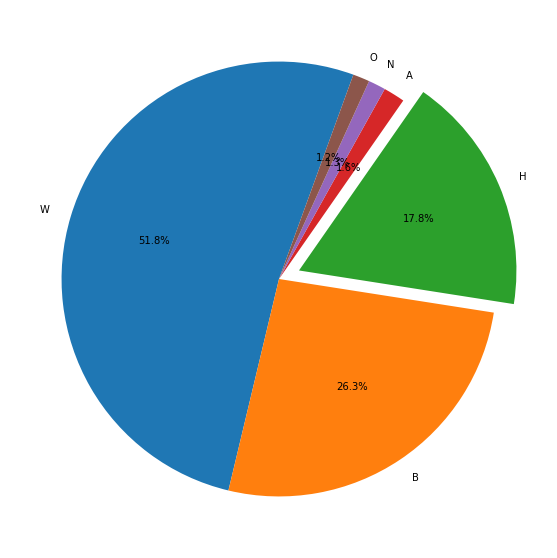

In [199]:
explode = (0, 0, 0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(x = sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
#         shadow=True, 
        startangle=70,
#         radius=1.5,
       );

## 3a.Box plot of age in both genders separeted by manner of death.

In [200]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [201]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

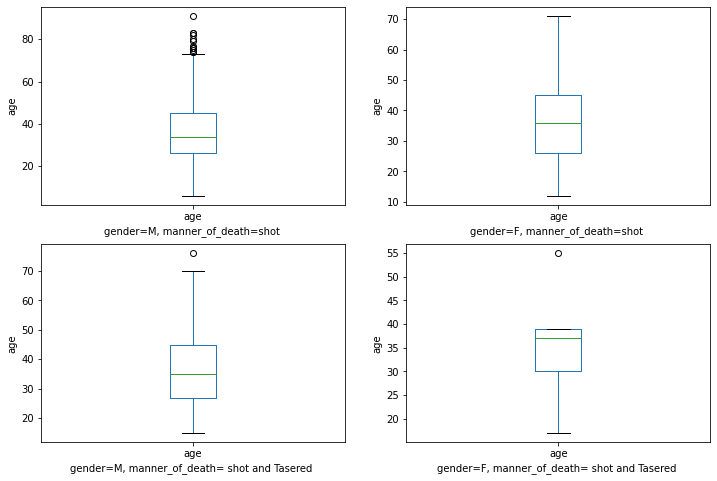

In [202]:
# with pandas
fig, ax = plt.subplots(2,2,figsize=(12,8))


kill[(kill['gender']=='M') & (kill['manner_of_death']=='shot')]['age'].plot(kind='box',ax=ax[0,0])
ax[0,0].set_ylabel("age")
ax[0,0].set_xlabel("gender=M, manner_of_death=shot ")

kill[(kill['gender']=='F')  & (kill['manner_of_death']=='shot')]['age'].plot(kind='box',ax=ax[0,1])
ax[0,1].set_ylabel("age")
ax[0,1].set_xlabel("gender=F, manner_of_death=shot ")

kill[(kill['gender']=='M') & (kill['manner_of_death']=='shot and Tasered')]['age'].plot(kind='box',ax=ax[1,0])
ax[1,0].set_ylabel("age")
ax[1,0].set_xlabel("gender=M, manner_of_death= shot and Tasered ")

kill[(kill['gender']=='F')  & (kill['manner_of_death']=='shot and Tasered')]['age'].plot(kind='box',ax=ax[1,1])
ax[1,1].set_ylabel("age")
ax[1,1].set_xlabel("gender=F, manner_of_death= shot and Tasered ")
plt.show()

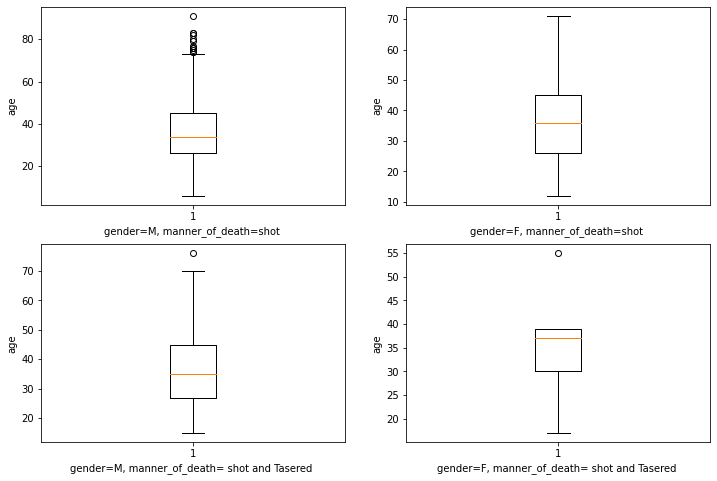

In [203]:
# with matplotlib
fig, ax = plt.subplots(2,2,figsize=(12,8))

ax[0,0].boxplot(kill[(kill['gender']=='M') & (kill['manner_of_death']=='shot')]['age'])
ax[0,0].set_ylabel("age")
ax[0,0].set_xlabel("gender=M, manner_of_death=shot ")

ax[0,1].boxplot(kill[(kill['gender']=='F') & (kill['manner_of_death']=='shot')]['age'])
ax[0,1].set_ylabel("age")
ax[0,1].set_xlabel("gender=F, manner_of_death=shot ")

ax[1,0].boxplot(kill[(kill['gender']=='M') & (kill['manner_of_death']=='shot and Tasered')]['age'])
ax[1,0].set_ylabel("age")
ax[1,0].set_xlabel("gender=M, manner_of_death= shot and Tasered ")

ax[1,1].boxplot(kill[(kill['gender']=='F') & (kill['manner_of_death']=='shot and Tasered')]['age'])
ax[1,1].set_ylabel("age")
ax[1,1].set_xlabel("gender=F, manner_of_death= shot and Tasered ")
plt.show()

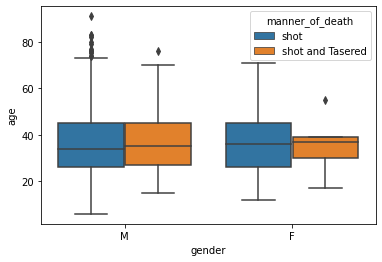

In [204]:
# with seaborn
sns.boxplot(x="gender", y="age", hue = "manner_of_death", data=kill);

## 3b. Swarm or Violin Plot 

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm or violin plot.**

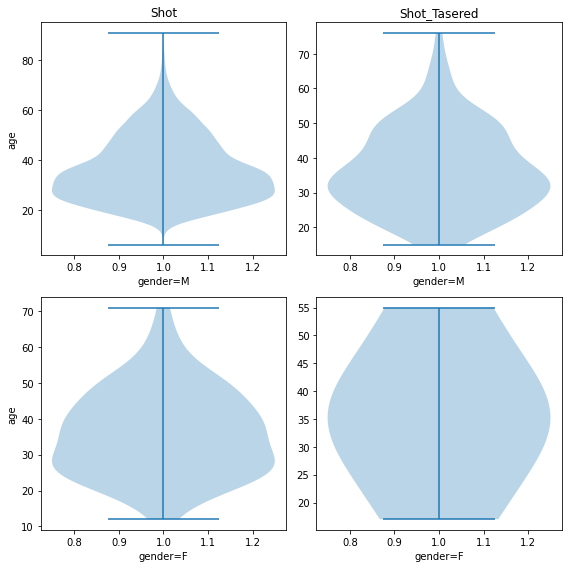

In [205]:
# with matplotlib
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.violinplot(kill[(kill["gender"]=="M") & (kill["manner_of_death"]=="shot")]["age"])
plt.title("Shot")
plt.ylabel("age")
plt.xlabel("gender=M")

plt.subplot(2, 2, 2)
plt.violinplot(kill[(kill["gender"]=="M") & (kill["manner_of_death"]=="shot and Tasered")]["age"])
plt.title("Shot_Tasered")
plt.xlabel("gender=M")

plt.subplot(2, 2, 3)
plt.violinplot(kill[(kill["gender"]=="F") & (kill["manner_of_death"]=="shot")]["age"])
plt.ylabel("age")
plt.xlabel("gender=F")

plt.subplot(2, 2, 4)
plt.violinplot(kill[(kill["gender"]=="F") & (kill["manner_of_death"]=="shot and Tasered")]["age"])
plt.xlabel("gender=F")

plt.tight_layout() 

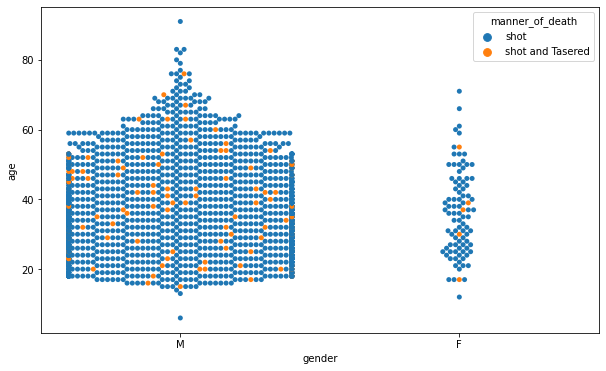

In [206]:
# with seaborn
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="gender", y="age", hue = "manner_of_death", data=kill);

## 5. Kill properties

**INSTRUCTION-1: Plot number of people by gender**

In [207]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


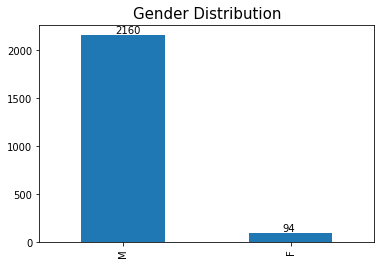

In [208]:
# with pandas

fig, ax = plt.subplots()
kill.gender.value_counts().plot(kind='bar', ax=ax)
# or
# ax = kill.gender.value_counts().plot(kind='bar')

ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

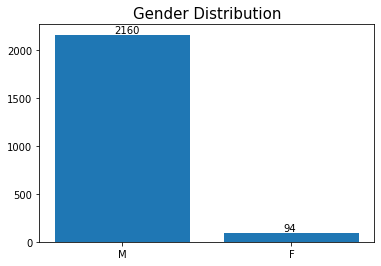

In [209]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(kill.gender.value_counts().index,kill.gender.value_counts().values)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

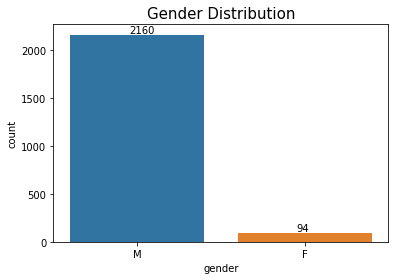

In [210]:
# with seaborn
fig, ax = plt.subplots()
sns.countplot(x="gender", data=kill)
ax.set_title("Gender Distribution", fontsize=15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+20));

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [211]:
common_weapons = kill.armed.value_counts(dropna=False)[:7]
common_weapons

gun             1247
knife            324
unarmed          165
vehicle          158
toy weapon       102
undetermined      92
machete           16
Name: armed, dtype: int64

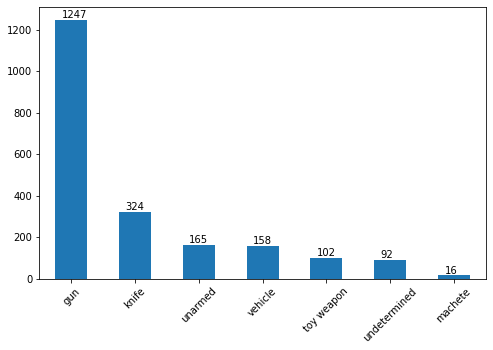

In [212]:
# with pandas
fig, ax = plt.subplots(figsize=(8,5))
common_weapons.plot(kind='bar',ax=ax)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

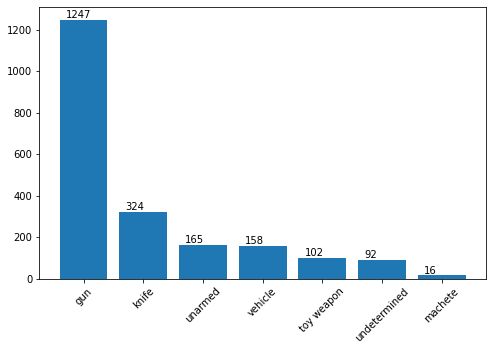

In [213]:
# with matplotlib
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x = common_weapons.index, height=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

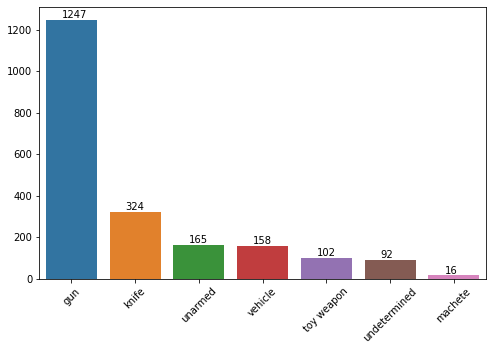

In [214]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=common_weapons.index, y=common_weapons.values)
ax.set_xticklabels(common_weapons.index, rotation=45)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.25, p.get_height()+10));

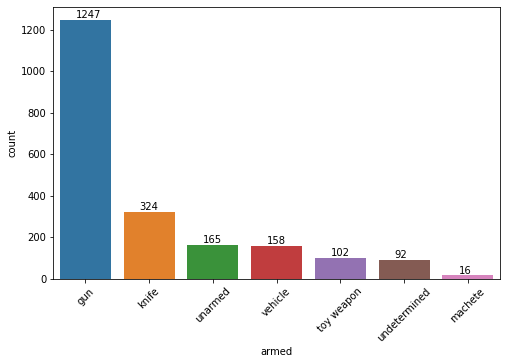

In [215]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='armed', data=kill, order=kill.armed.value_counts().iloc[:7].index )
ax.set_xticklabels(kill.armed.value_counts().iloc[:7].index, rotation=45)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.25, p.get_height()+10));

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [216]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [217]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >25 else "below25")

In [218]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [219]:
age_class = kill.age_cat.value_counts()
age_class

above25    1737
below25     517
Name: age_cat, dtype: int64

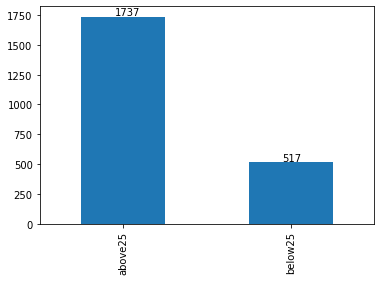

In [220]:
# with pandas
ax = age_class.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.2, p.get_height()+10));

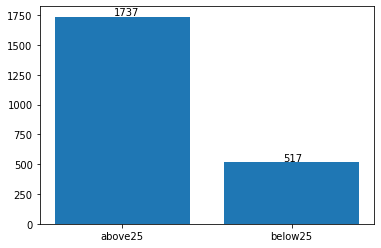

In [221]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x = age_class.index, height= age_class.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

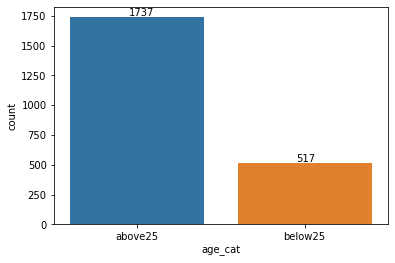

In [222]:
# with seaborn
ax = sns.countplot(x="age_cat", data=kill)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));

**INSTRUCTION-4: Plot number of killed poeple by race**

In [223]:
race_freq = kill.race.value_counts()
race_freq

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

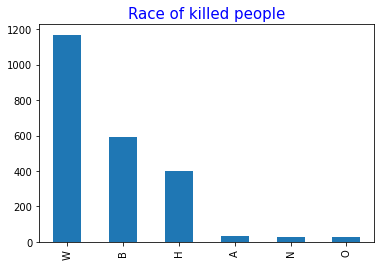

In [224]:
# with pandas
ax = race_freq.plot.bar()
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

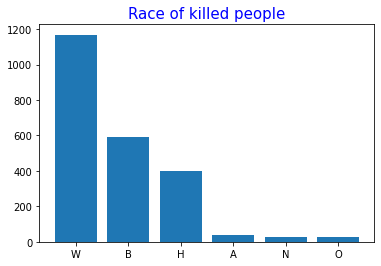

In [225]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(x=race_freq.index, height=race_freq.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

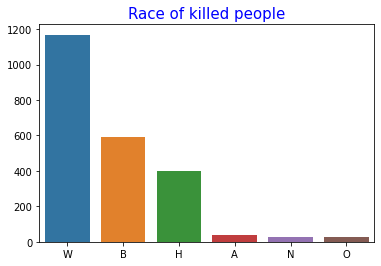

In [226]:
# with seaborn barplot
# fig, ax = plt.subplots()
ax = sns.barplot(x=race_freq.index, y=race_freq.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

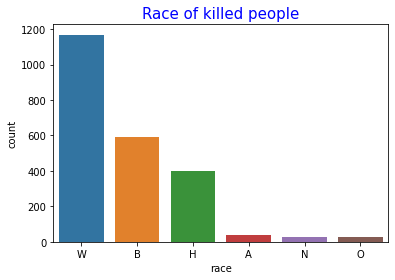

In [227]:
# with seaborn countplot
fig, ax = plt.subplots()
sns.countplot(x="race", data=kill,
             order=race_freq.index,
             )
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

**INSTRUCTION-5: Plot 12 most dangerous cities**

In [228]:
city_freq = kill.city.value_counts()[:12]
city_freq

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
San Antonio     15
Miami           15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

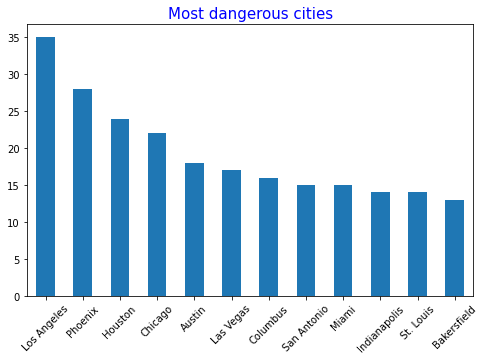

In [229]:
# with pandas
ax = city_freq.plot.bar(rot=45, figsize=(8,5))
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

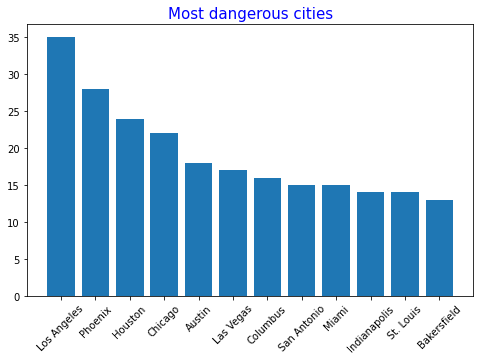

In [230]:
# with matplotlib
fig, ax =plt.subplots(figsize=(8,5))
ax.bar(x=city_freq.index, height=city_freq.values)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15)
ax.set_xticklabels(city_freq.index, rotation = 45);

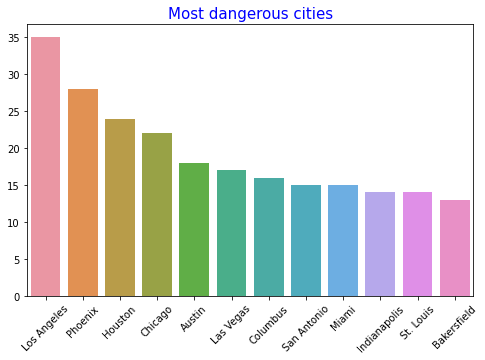

In [231]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=city_freq.index, y=city_freq.values)
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

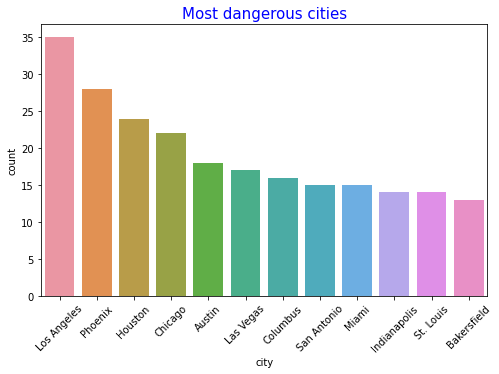

In [232]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="city", data=kill,
             order=city_freq.index,
             )
ax.set_xticklabels(city_freq.index, rotation = 45)
ax.set_title('Most dangerous cities',color = 'blue',fontsize=15);

**INSTRUCTION-6: Plot 20 most dangerous states**

In [233]:
state_freq = kill.state.value_counts()[:20]
state_freq

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
IL     56
TN     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
SC     41
Name: state, dtype: int64

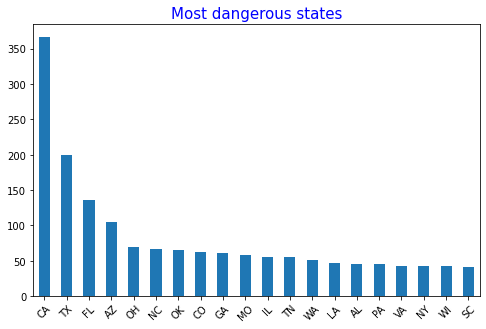

In [234]:
# with pandas
ax = state_freq.plot.bar(rot=45, figsize=(8,5))
ax.set_title('Most dangerous states',color = 'blue',fontsize=15);

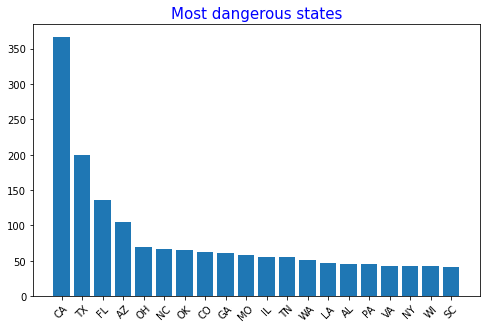

In [235]:
# with matplotlib
fig, ax =plt.subplots(figsize=(8,5))
ax.bar(x=state_freq.index, height=state_freq.values)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15)
ax.set_xticklabels(state_freq.index, rotation = 45);

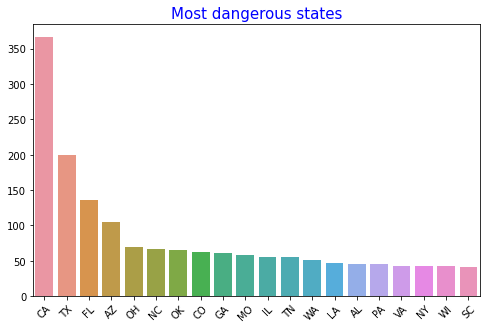

In [236]:
# with seaborn barplot
fig, ax =plt.subplots(figsize=(8,5))
ax = sns.barplot(x=state_freq.index, y=state_freq.values)
ax.set_xticklabels(state_freq.index, rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15);

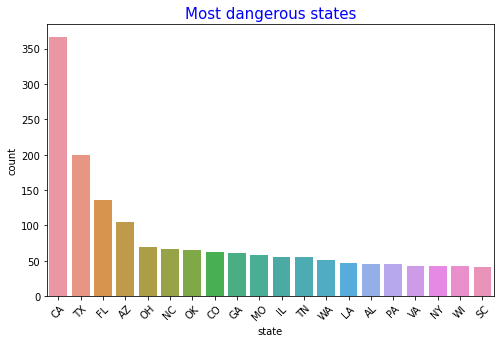

In [237]:
# with seaborn countplot
fig, ax =plt.subplots(figsize=(8,5))
sns.countplot(x="state", data=kill,
             order=state_freq.index,
             )
ax.set_xticklabels(state_freq.index, rotation = 45)
ax.set_title('Most dangerous states',color = 'blue',fontsize=15);

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

In [238]:
illness = kill.signs_of_mental_illness.value_counts()
illness

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

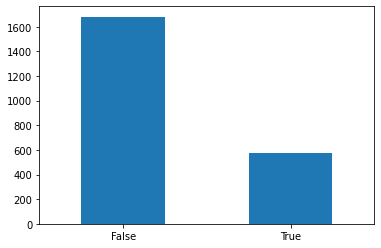

In [239]:
# with pandas
illness.plot.bar(rot=0);

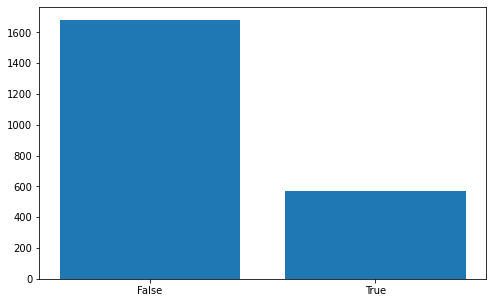

In [240]:
# with matplotlib
fig, ax =plt.subplots(figsize=(8,5))
ax.bar(x=illness.index,
       height=illness.values)
ax.set_xticks(np.arange(illness.size))
ax.set_xticklabels(illness.index, rotation = 0);

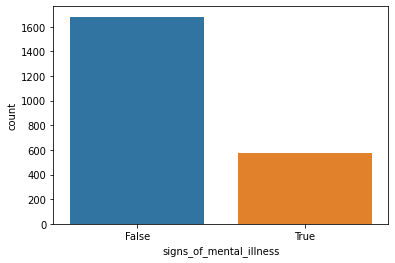

In [241]:
# with seaborn
sns.countplot(kill.signs_of_mental_illness);

**INSTRUCTION-8: Plot number of Threat Types**

In [242]:
threads_freq = kill.threat_level.value_counts()
threads_freq

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

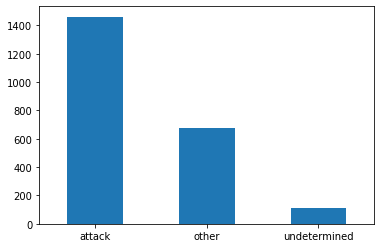

In [243]:
# with pandas
threads_freq.plot.bar(rot=0);
# kill.threat_level.value_counts().plot.bar(rot=0);

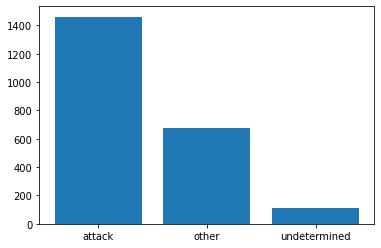

In [244]:
# with matplotlib
fig, ax =plt.subplots()
ax.bar(x=threads_freq.index,
       height=threads_freq.values)
ax.set_xticks(np.arange(threads_freq.size))
ax.set_xticklabels(threads_freq.index, rotation = 0);

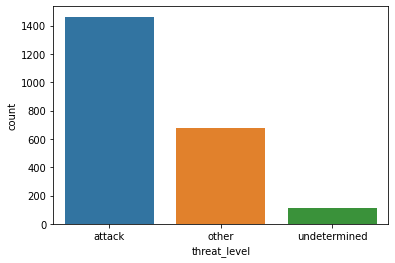

In [245]:
# with seaborn
sns.countplot(kill.threat_level);

**INSTRUCTION-9: Plot number of Flee Types**

In [246]:
flee_freq = kill.flee.value_counts()
flee_freq

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

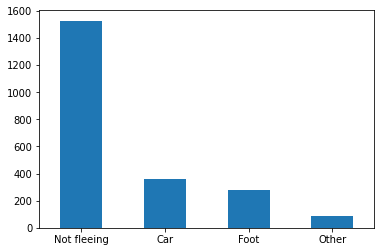

In [247]:
# with pandas
flee_freq.plot.bar(rot=0);

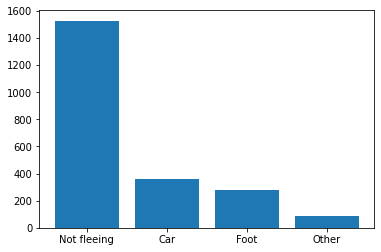

In [248]:
# with matplotlib
fig, ax =plt.subplots()
ax.bar(x=flee_freq.index,
       height=flee_freq.values)
ax.set_xticks(np.arange(flee_freq.size))
ax.set_xticklabels(flee_freq.index, rotation = 0);

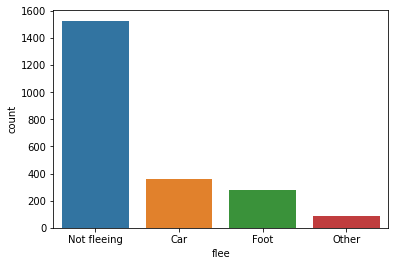

In [249]:
# with seaborn
sns.countplot(kill.flee);